## Level 2

### Internship Project

#### Cognifyz Technologies

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Internship dataset.csv")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


### Task 1: Restaurant Ratings

### Analyze the distribution of aggregate ratings and determine the most common rating range.

In [3]:
# Check the unique values of Aggregate rating to understand the range
print(df['Aggregate rating'].unique())

[4.8 4.5 4.4 4.9 4.  4.2 4.3 3.6 4.7 3.  3.8 3.7 3.2 3.1 0.  4.1 3.3 4.6
 3.9 3.4 3.5 2.2 2.9 2.4 2.6 2.8 2.1 2.7 2.5 1.8 2.  2.3 1.9]


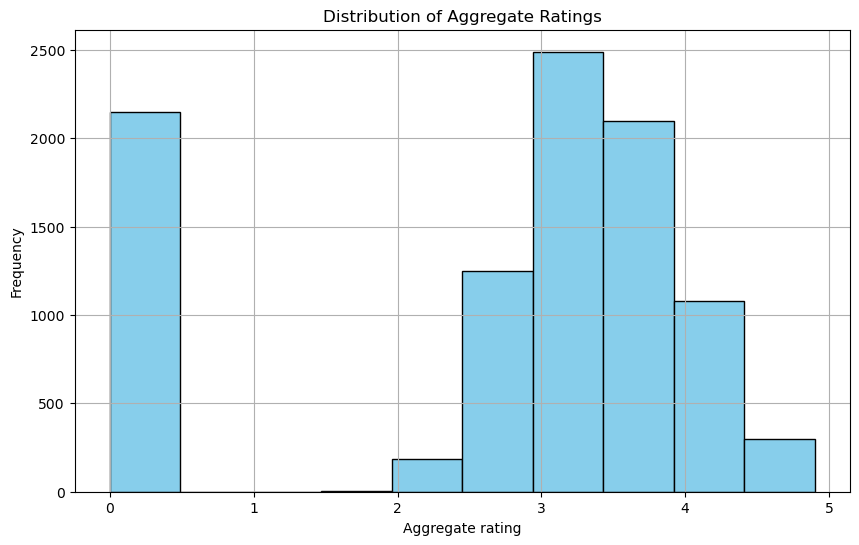

In [4]:
# Plot the histogram of Aggregate rating
plt.figure(figsize=(10,6))
plt.hist(df['Aggregate rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Aggregate rating')
plt.ylabel('Frequency')
plt.title('Distribution of Aggregate Ratings')
plt.grid(True)
plt.show()

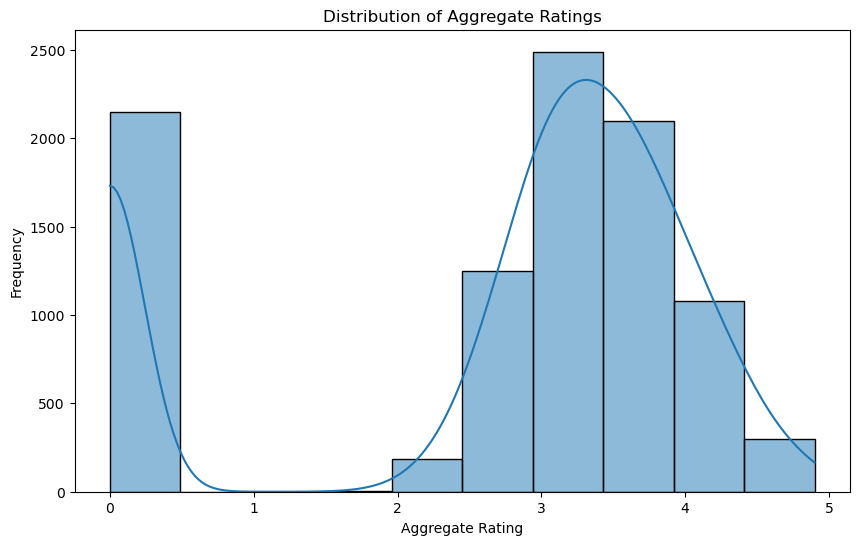

In [5]:
# Plotting the distribution of aggregate ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=10, kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()


### Calculate the average number of votes received by restaurants.


In [6]:
# Determine the most common rating range
rating_counts = df['Aggregate rating'].value_counts().sort_index()
most_common_range = rating_counts.idxmax()

print(f"The most common rating is: {most_common_range}")

The most common rating is: 0.0


In [7]:
# Calculate the average number of votes received by restaurants
average_votes = df['Votes'].mean()
print("Average number of votes received by restaurants:", average_votes)

Average number of votes received by restaurants: 156.909747670401


### Task 2: Cuisine Combination

### Identify the most common combinations of cuisines in the dataset

In [8]:
df['Cuisines'].isnull().sum()

9

In [9]:
# Drop rows with missing values in the 'Cuisines' column
data_cleaned = df.dropna(subset=['Cuisines'],inplace=True)

In [10]:
# Split the cuisines into individual cuisines and flatten the list of lists
cuisine_list = [cuisine.strip() for sublist in df['Cuisines'].str.split(',') for cuisine in sublist]

# Count the occurrences of each cuisine
cuisine_counter = Counter(cuisine_list)


In [11]:
# Get the most common combinations of cuisines
most_common_cuisines = cuisine_counter.most_common(10)

# Print the result
print("Top 10 most common combinations of cuisines:")
for cuisine, count in most_common_cuisines:
    print(cuisine, ":", count)

Top 10 most common combinations of cuisines:
North Indian : 3960
Chinese : 2735
Fast Food : 1986
Mughlai : 995
Italian : 764
Bakery : 745
Continental : 736
Cafe : 703
Desserts : 653
South Indian : 636


### Determine if certain cuisine combinations tend to have higher ratings.


In [12]:
cuisine_ratings_list = []

# Iterate over each row in the dataset
for index, row in df.iterrows():
    cuisines = [cuisine.strip() for cuisine in row['Cuisines'].split(',')]
    average_rating = row['Aggregate rating']
    
    # Add the average rating to the corresponding cuisine combination in the list
    for cuisine in cuisines:
        # Check if the cuisine combination already exists in the list
        existing_combinations = [item['Cuisine Combination'] for item in cuisine_ratings_list]
        if cuisine in existing_combinations:
            # If the cuisine combination already exists in the list, update the average rating
            for item in cuisine_ratings_list:
                if item['Cuisine Combination'] == cuisine:
                    item['Average Rating'] += average_rating
        else:
            # If the cuisine combination doesn't exist, add it to the list
            cuisine_ratings_list.append({'Cuisine Combination': cuisine, 'Average Rating': average_rating})

In [13]:
# Calculate the average rating for each cuisine combination
for item in cuisine_ratings_list:
    item['Average Rating'] /= len(df[df['Cuisines'].str.contains(item['Cuisine Combination'])])

# Convert the list to a DataFrame
cuisine_ratings = pd.DataFrame(cuisine_ratings_list)

# Sort the DataFrame by average rating in descending order
cuisine_ratings = cuisine_ratings.sort_values(by='Average Rating', ascending=False)

# Print the top 10 cuisine combinations with the highest average ratings
print("Top 10 cuisine combinations with the highest average ratings:")
print(cuisine_ratings.head(10))

Top 10 cuisine combinations with the highest average ratings:
    Cuisine Combination  Average Rating
126               Sunda        4.900000
144              B�_rek        4.700000
130           Taiwanese        4.650000
127               Ramen        4.500000
75              Dim Sum        4.466667
63             Hawaiian        4.412500
58           Bubble Tea        4.400000
142              D�_ner        4.400000
134               Curry        4.400000
138               Kebab        4.380000


### Task 3: Geographic Analysis

### Plot the locations of restaurants on a map using longitude and latitude coordinates.

In [14]:
!pip install plotly

In [15]:
# Create a map centered at the mean latitude and longitude of the dataset
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=10)

# Add markers for each restaurant
for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(restaurant_map)

NameError: name 'folium' is not defined

## Identify any patterns or clusters of restaurants in specific areas.

In [16]:
pip install pandas scikit-learn folium

In [17]:
import numpy as np
from sklearn.cluster import DBSCAN
import folium

# Drop rows where 'Longitude' or 'Latitude' is NaN
df = df.dropna(subset=['Longitude', 'Latitude'])

# Extract the relevant columns
coordinates = df[['Latitude', 'Longitude']].values

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.01, min_samples=5)  # Adjust eps and min_samples as needed
clusters = dbscan.fit_predict(coordinates)

# Add the cluster labels to the DataFrame
df['Cluster'] = clusters

# Initialize a map centered around the mean latitude and longitude
mean_lat = df['Latitude'].mean()
mean_lon = df['Longitude'].mean()
restaurant_map = folium.Map(location=[mean_lat, mean_lon], zoom_start=12)

# Define colors for different clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 
          'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 
          'lightgreen', 'gray', 'black', 'lightgray']

# Add markers for each restaurant, color-coded by cluster
for _, row in df.iterrows():
    cluster_color = colors[row['Cluster'] % len(colors)] if row['Cluster'] != -1 else 'gray'
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Restaurant Name'],
        icon=folium.Icon(color=cluster_color, icon='info-sign')
    ).add_to(restaurant_map)

# Save the map to an HTML file
restaurant_map.save('restaurant_clusters_map.html')

# Display the map (this works directly in Jupyter Notebook)
restaurant_map

# Display basic cluster statistics
cluster_counts = df['Cluster'].value_counts().sort_index()
print("Cluster counts:")
print(cluster_counts)


Cluster counts:
Cluster
-1     938
 0       5
 1      15
 2      13
 3       7
      ... 
 90      5
 91      6
 92     11
 93      7
 94      5
Name: count, Length: 96, dtype: int64


### Task 4: Restaurant Chains

### Identify if there are any restaurant chains present in the dataset

In [19]:
# Group the dataset by restaurant name and count the occurrences
restaurant_counts = df['Restaurant Name'].value_counts()

# Filter the restaurant names where the count is greater than 1
restaurant_chains = restaurant_counts[restaurant_counts > 1]

# Print the restaurant chains present in the dataset
print("Restaurant chains present in the dataset:")
print(restaurant_chains)

Restaurant chains present in the dataset:
Restaurant Name
Cafe Coffee Day                   83
Domino's Pizza                    79
Subway                            63
Green Chick Chop                  51
McDonald's                        48
                                  ..
Zaika Kathi Rolls                  2
The Night Owl                      2
The Cheesecake Factory             2
New Kadimi                         2
Ceviche Tapas Bar & Restaurant     2
Name: count, Length: 734, dtype: int64


In [20]:
# Drop rows where 'Restaurant Name' or 'Aggregate rating' or 'Votes' is NaN
df = df.dropna(subset=['Restaurant Name', 'Aggregate rating', 'Votes'])

In [21]:
# Group by restaurant name and calculate average rating and total number of votes
restaurant_analysis = df.groupby('Restaurant Name').agg(
    average_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum')
).reset_index()


In [22]:
# Sort by average rating in descending order
top_rated_restaurants = restaurant_analysis.sort_values(by='average_rating', ascending=False)

# Sort by total number of votes in descending order
most_popular_restaurants = restaurant_analysis.sort_values(by='total_votes', ascending=False)

In [23]:
# Display the top 10 top-rated restaurants
print("Top 10 top-rated restaurants:")
print(top_rated_restaurants.head(10))

Top 10 top-rated restaurants:
                          Restaurant Name  average_rating  total_votes
4175                      Mirchi And Mime             4.9         3244
7330                      Yellow Dog Eats             4.9         1252
6970        Tresind - Nassima Royal Hotel             4.9         1352
3140              Ingleside Village Pizza             4.9          478
3110            Indian Accent - The Manor             4.9         1934
4987  Pom Pom's Teahouse and Sandwicheria             4.9         1457
5179                   Rae's Coastal Cafe             4.9          548
945                    Braseiro da G��vea             4.9           40
5469                Sagar Gaire Fast Food             4.9          427
2130                        Duck & Waffle             4.9          706


In [24]:
# Display the top 10 most popular restaurants
print("\nTop 10 most popular restaurants:")
print(most_popular_restaurants.head(10))


Top 10 most popular restaurants:
                Restaurant Name  average_rating  total_votes
663             Barbeque Nation        4.353846        28142
101   AB's - Absolute Barbecues        4.825000        13400
6935                       Toit        4.800000        10934
785                   Big Chill        4.475000        10853
2294                 Farzi Cafe        4.366667        10098
6980                   Truffles        3.950000         9682
1510                    Chili's        4.580000         8156
2875           Hauz Khas Social        4.300000         7931
3255               Joey's Pizza        4.250000         7807
4894                  Peter Cat        4.300000         7574
